In [42]:
using LinearAlgebra
using Statistics
using SparseArrays
using MLDatasets
using PyPlot

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/cdesa/.julia/packages/PyPlot/4wzW1/src/init.jl:192


## Test of Johnson-Lindenstrauss transform

In [2]:
d = 100000;
n = 100;

Xs = randn(d,n); # the dataset

In [3]:
epsilon = 0.1;
D = Int64(ceil(8 * log(n) / epsilon^2))

3685

In [4]:
A = randn(D, d) / sqrt(D);

In [5]:
# let's loook at this for a single example
norm(Xs[:,1] - Xs[:,2])

448.54428156931044

In [6]:
norm(A*Xs[:,1] - A*Xs[:,2])

448.88660589574613

In [7]:
norm(A*Xs[:,1] - A*Xs[:,2]) / norm(Xs[:,1] - Xs[:,2])

1.000763189590196

In [8]:
AXs = A*Xs;

In [9]:
# over the whole dataset
extrema((i == j) ? 1.0 : norm(AXs[:,i] - AXs[:,j]) / norm(Xs[:,i] - Xs[:,j]) for i = 1:n, j = 1:n)   

(0.9587433230490978, 1.0441835062870137)

In [10]:
# how much did we decrease the dimension?
D/d

0.03685

## Principal Component Analysis

In [33]:
n = 60000;
d = 28*28;

In [34]:
train_x, train_y = MNIST.traindata();

In [35]:
train_x = Float64.(reshape(train_x, (d, n)));

In [36]:
train_x_mean = mean(train_x; dims=2);

In [37]:
train_x_minus_mean = train_x .- train_x_mean;

$$\Sigma = \frac{1}{n} \sum_{i=1}^n \left( x_i - \frac{1}{n} \sum_{j=1}^n x_j \right) \left( x_i - \frac{1}{n} \sum_{j=1}^n x_j \right)^T$$

In [38]:
Sigma = (train_x_minus_mean * train_x_minus_mean')/n;

In [39]:
# find the eigendecomposition of Sigma
ESigma = eigen(Sigma; sortby = (x -> -x))

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
784-element Array{Float64,1}:
  5.116787728342092     
  3.7413284788648085    
  3.252654239684484     
  2.8415733372665475    
  2.5670749588127753    
  2.273625491620609     
  1.7251262295281964    
  1.5205348976536206    
  1.456280980887692     
  1.2427293764173302    
  1.1120709732036003    
  1.066622765935621     
  0.9046657547344794    
  ⋮                     
 -3.574014070978416e-21 
 -1.6262010726005163e-18
 -1.9976326138197453e-18
 -4.317047225977123e-18 
 -5.344724957615432e-18 
 -6.063231870212325e-18 
 -8.198275315499658e-18 
 -1.6682208017055038e-17
 -2.4886304446364175e-17
 -4.1352942578342993e-17
 -4.9271059508835396e-17
 -7.790447889517499e-17 
eigenvectors:
784×784 Array{Float64,2}:
  0.0         0.0          0.0          …   0.0           0.0        
  0.0         0.0          0.0              0.0           0.0        
  0.0         0.0          0.0              0.0           0.0        


In [40]:
# largest eigenvalue
ESigma.values[1]

5.116787728342092

In [41]:
# corresponding eigenvector
ESigma.vectors[:, 1]

784-element Array{Float64,1}:
  0.0                  
  0.0                  
  0.0                  
  0.0                  
  0.0                  
  0.0                  
  0.0                  
  0.0                  
  0.0                  
  0.0                  
  0.0                  
  0.0                  
 -1.1302299848127289e-6
  ⋮                    
 -8.768996662288347e-5 
 -4.5961971626570395e-5
 -1.2747685973129338e-5
  1.7252770690590058e-5
  5.512661031714661e-6 
 -2.5936358873102083e-7
 -4.952733259656894e-7 
  1.3784202612423531e-7
  0.0                  
  0.0                  
  0.0                  
  0.0                  

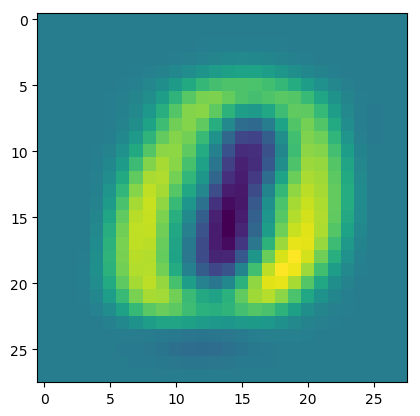

In [104]:
imshow(reshape(ESigma.vectors[:, 1], (28,28))');

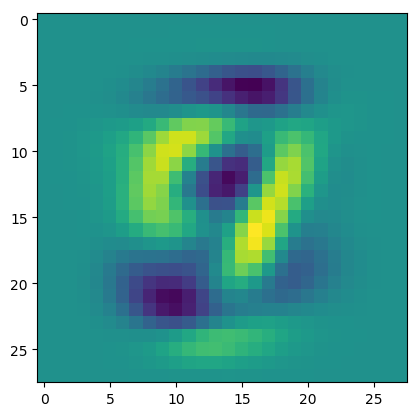

In [103]:
imshow(reshape(ESigma.vectors[:, 2], (28,28))');

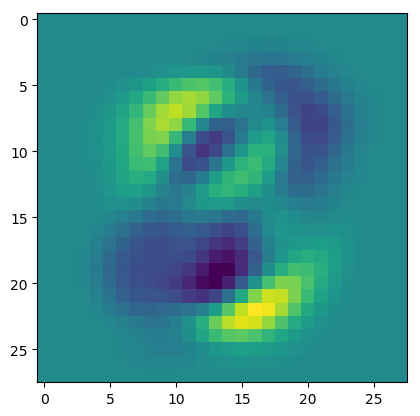

In [105]:
imshow(reshape(ESigma.vectors[:, 3], (28,28))');

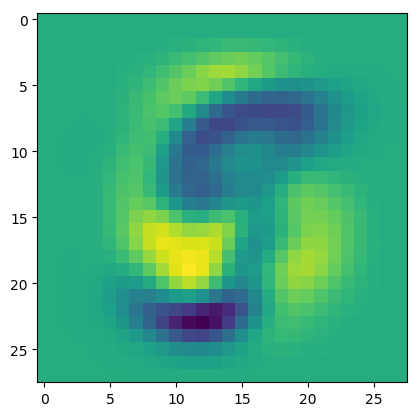

In [106]:
imshow(reshape(ESigma.vectors[:, 4], (28,28))');

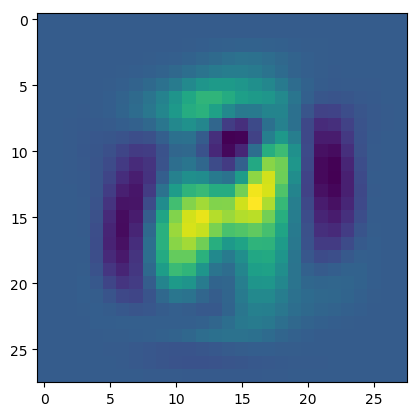

In [107]:
imshow(reshape(ESigma.vectors[:, 5], (28,28))');

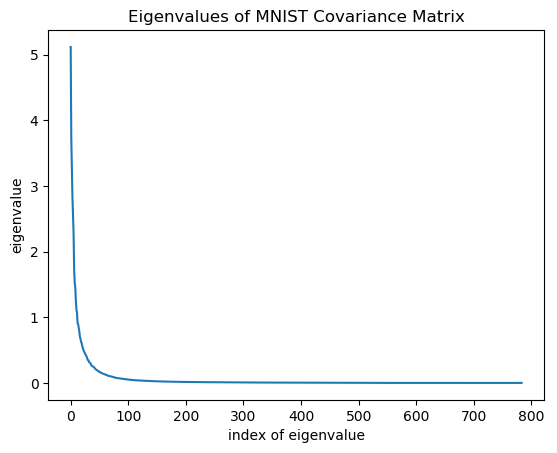

In [98]:
plot(ESigma.values)
ylabel("eigenvalue")
xlabel("index of eigenvalue")
title("Eigenvalues of MNIST Covariance Matrix");

PCA can represent objects in low dimension without losing information.

In [204]:
D = 5;

In [205]:
A = ESigma.vectors[:, 1:D]';

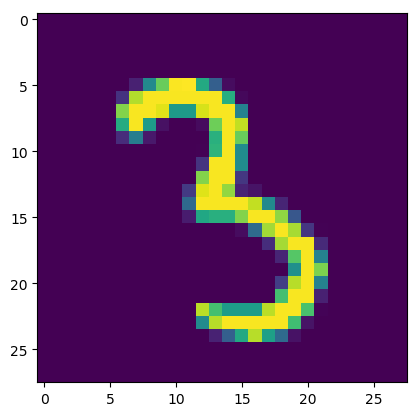

In [206]:
# original image
i = 1337;
imshow(reshape(train_x[:,i], (28,28))');

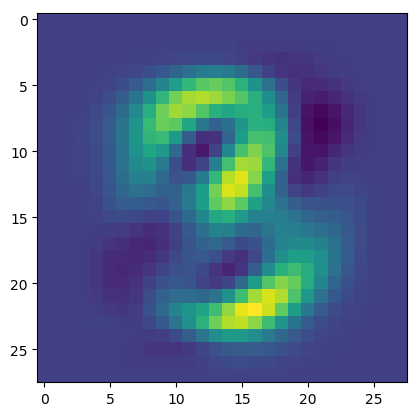

In [207]:
# dimension-reduced image
x_dr = A * train_x_minus_mean[:,i]
x_recovered = A' * x_dr + train_x_mean;

# original image
imshow(reshape(x_recovered, (28,28))');

Still enough to classify the image!

## Sparsity

In [158]:
n = 4096;
X = sprand(n,n,0.1);
Y = sprand(n,n,0.1);

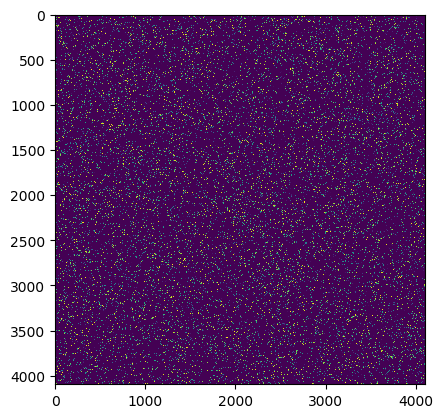

In [159]:
# visualize it
imshow(X);

In [160]:
# get the size of X in bytes
Base.summarysize(X)

26860232

In [161]:
# type of X
typeof(X)

SparseMatrixCSC{Float64,Int64}

In [162]:
Xdense = Matrix(X);
Ydense = Matrix(Y);
typeof(Xdense)

Array{Float64,2}

In [163]:
Base.summarysize(Xdense)

134217768

In [164]:
# what's the ratio?
Base.summarysize(X) / Base.summarysize(Xdense)

0.20012426372639425

In [165]:
# what fraction of X's entries are nonzero?
nnz(X) / length(X)

0.09993946552276611

Why are these numbers not equal?

In [170]:
@time X * Y;

  1.154538 seconds (13 allocations: 281.636 MiB)


In [198]:
dense_mmpy_time = @elapsed Xdense * Ydense

0.757481618

What happened here???

In [196]:
# make X and Y less dense
Xsparser = sprand(n,n,0.01);
Ysparser = sprand(n,n,0.01);
@time Xsparser * Ysparser;

  0.121585 seconds (13 allocations: 94.618 MiB)


In [186]:
densities = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3];
sparse_mm_times = Float64[];
for d in densities
    Xsparse = sprand(n,n,d);
    Ysparse = sprand(n,n,d);
    push!(sparse_mm_times, @elapsed(Xsparse * Ysparse));
end

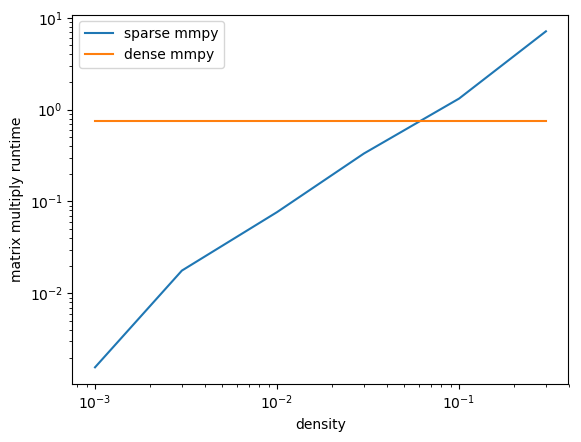

In [199]:
loglog(densities, sparse_mm_times; label="sparse mmpy");
loglog(densities, densities * 0 .+ dense_mmpy_time; label="dense mmpy");
xlabel("density");
ylabel("matrix multiply runtime");
legend();